In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('../input/forestfires.csv')

In [109]:
with open('../input/forestfires.names','rb') as f:
    page = f.read().decode('latin-1')

# Dataset Description

The dataset is about forest fire data of Montesinho natural park. This park is in Northeast region of Portugal.

## Dimensions

In [57]:
print('Dimensions' )
print('No. of Predictors' , df.shape[1]-1)
print('No. of Observations' , df.shape[0])

Dimensions
No. of Predictors 12
No. of Observations 517


## Predictor Variables 

1.X - x-axis spatial coordinate within the Montesinho park map: 1 to 9


2.Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 


3.month - month of the year: "jan" to "dec" 


4.day - day of the week: "mon" to "sun" 


5.FFMC - FFMC index from the FWI system: 18.7 to 96.20  <br>
  Fine Fuel Moisture Code <br>
  the FFMC denotes the moisture content surface litter and influences ignition and fire spread
   
   
6.DMC - DMC index from the FWI system: 1.1 to 291.3 <br>
   Duff Moisture Code <br>
   Moisture content in shallow organic layers. <br>
  
7.DC - DC index from the FWI system: 7.9 to 860.6 <br>
  Drought Code <br>
  Moisture content in deep organic layers.<br>

8.ISI - ISI index from the FWI system: 0.0 to 56.10     
  Initial Spred Index. fire velocity spread.


9.temp - temperature in Celsius degrees: 2.2 to 33.30   


10.RH - relative humidity in %: 15.0 to 100



11.wind - wind speed in km/h: 0.40 to 9.40 


12.rain - outside rain in mm/m2 : 0.0 to 6.4 
     

## Predictors type

In [44]:
pd.DataFrame(zip(df.columns[:-1]  , ['continuous','continuous','nominal','nominal','continuous','continuous',
'continuous','continuous','continuous','continuous','continuous','continuous']),columns =['predictor','type'])

,predictor,type
0,X,continuous
1,Y,continuous
2,month,nominal
3,day,nominal
4,FFMC,continuous
5,DMC,continuous
6,DC,continuous
7,ISI,continuous
8,temp,continuous
9,RH,continuous


Adapted from S. Taylor and M. Alexander. Science, technology, and human factors in fire danger rating:
the Canadian experience. International Journal of Wildland Fire, 15:121–135, 2006.

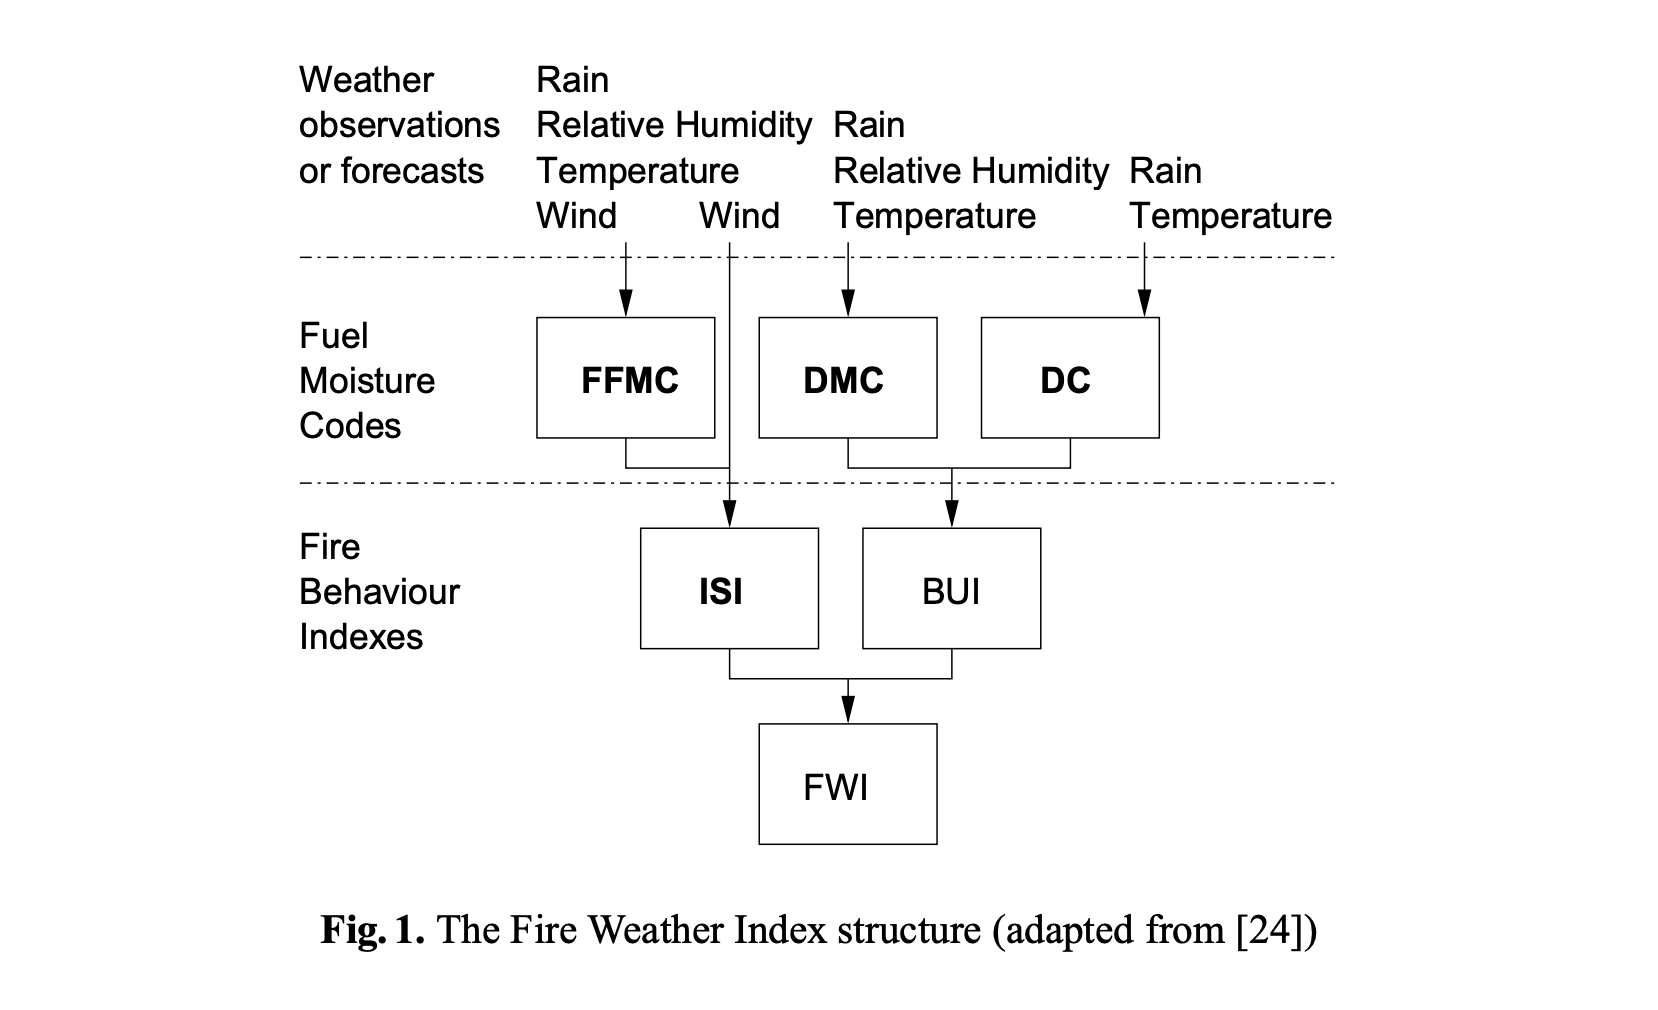

## Reponse variable

area - the burned area of the forest (in ha): 0.00 to 1090.84  <b>(Continuous response)</b>

## Response type

In [52]:
pd.DataFrame([[df.columns[-1],'continuous']],columns = ['response','type'])

,response,type
0,area,continuous


In [71]:
import matplotlib.pyplot as plt

# Exploratory Analysis

In [74]:
# checking the distribution of target variable

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

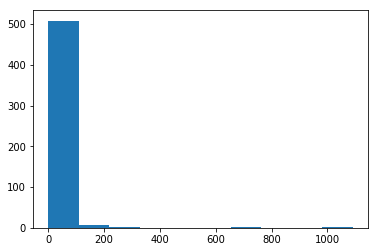

In [75]:
plt.hist(df.area)

In [77]:
import seaborn as sns
print(df.shape)
print(df.columns)

(517, 13)
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [81]:
df.area = np.log(df.area+1)

## Pairwise correlations plots with target variable

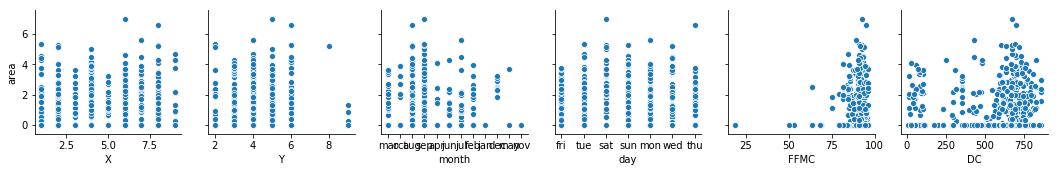

In [82]:
sns.pairplot(df[['X', 'Y', 'month', 'day', 'FFMC','DC','area']],x_vars=['X', 'Y', 'month', 'day', 'FFMC','DC'],
            y_vars=['area'])

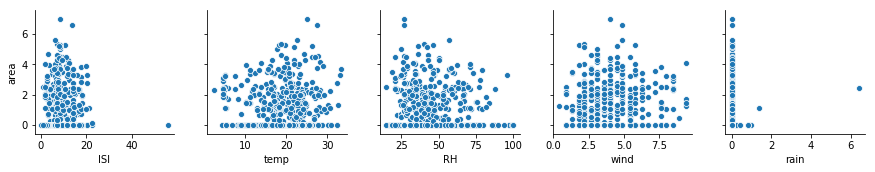

In [83]:
sns.pairplot(df[['ISI', 'temp', 'RH','wind', 'rain','area']] , x_vars = ['ISI', 'temp', 'RH','wind', 'rain'],
            y_vars = ['area'])

## Pairwise plots within in predictor variables

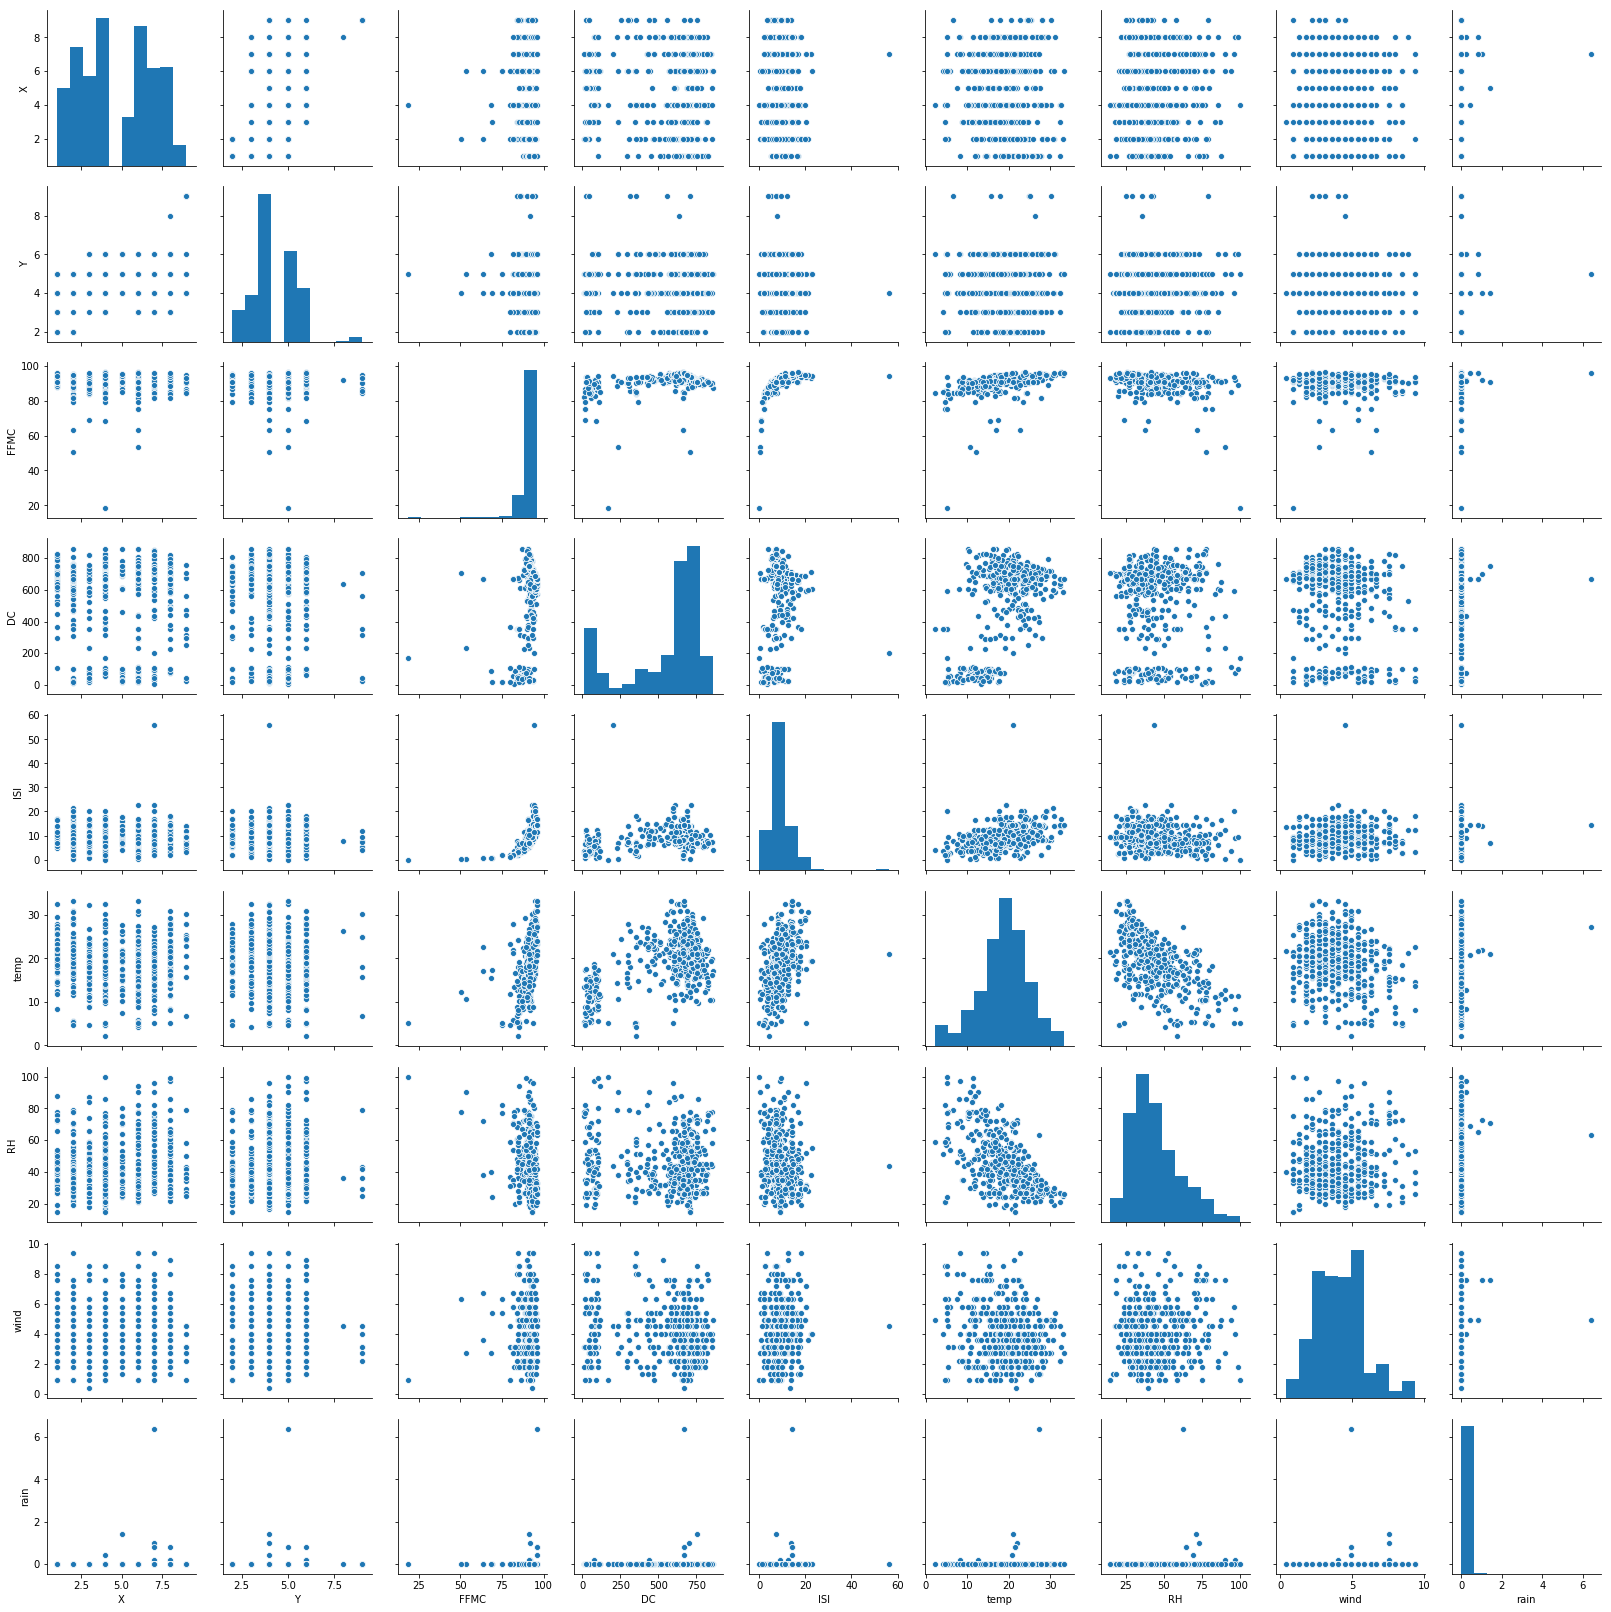

In [84]:
sns.pairplot(df[['X', 'Y', 'month', 'day', 'FFMC','DC','ISI', 'temp', 'RH','wind', 'rain']])

## Correlation plot

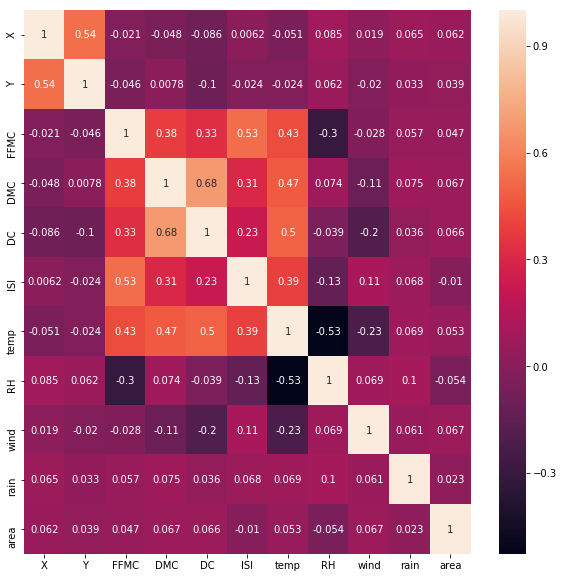

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

> 1. DMC and DC have moderate correlation. Since they are both measure of mositure content in shallow and organic 
ayers. 
> 1. Summer season has the most area burned by the forest fires.
> 1. No predictor shows correlation with the response variable 'area'. This may be a sign of existence of non-linear relationship between predictors and response.

In [124]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [134]:
df.groupby('month').area.mean()

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

## Convert months into seasons 
To reduce the dimensions of categorical variable

In [136]:
seasons_dict = {'spring':['mar','apr','may'],
    'summer': ['jun','jul','aug','sep'],
        'autumn': ['oct','nov'],
            'winter':['dec','jan','feb']}

In [139]:
d = {}
for i in seasons_dict:
    for j in seasons_dict[i]:
        d[j]=i

In [161]:
df['season'] = df['month'].apply(lambda x: d[x])

In [162]:
df.drop('month',axis=1,inplace=True)

In [165]:
df.groupby('season')['area'].mean()

season
autumn     6.223125
spring     5.442462
summer    14.674691
winter     7.918387
Name: area, dtype: float64

Let's build a model using all the variables <br>


In order to get the accuracy of model, model has to be trained on a training data and <br>
tested on hold-out (test data) which the model has not been trained on.<br>


# Modelling 

## Train and Test Split

In [169]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [343]:
def print_stats(model_str,data = df):
    train_df , test_df = train_test_split(data , test_size=0.2,random_state=0) # 20% of the data as the test data
    model = smf.ols(model_str  , train_df).fit()
    train_predictions = model.predict( train_df )
    pred_str = model_str.split('~')[0].strip()
    train_true  = train_df[pred_str]
    test_true = test_df[pred_str]
    test_predictions = model.predict(test_df)
    
    train_rmse = mean_squared_error(train_predictions , train_true);
    train_rmse = train_rmse**0.5
    
    test_rmse = mean_squared_error( test_predictions , test_true )
    test_rmse = test_rmse**0.5
    
    print('RMSE train/test {0}/{1}'.format(train_rmse , test_rmse))
    
    

In [181]:
reg = smf.ols('area ~ X + Y + day + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + season',data = train_df).fit()

In [182]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8484
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.648
Time:                        07:27:43   Log-Likelihood:                -2329.0
No. Observations:                 413   AIC:                             4698.
Df Residuals:                     393   BIC:                             4779.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -60.1756    128.145  

No variable shows significance in the t-tests <br>
Let us diagnose the model <br>

## qqplot

In [184]:
#2. check residual 
#2.1 Normality
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)


452959.10904355586 0.0 11.699548780194824 163.54457701603027


/Users/nithish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


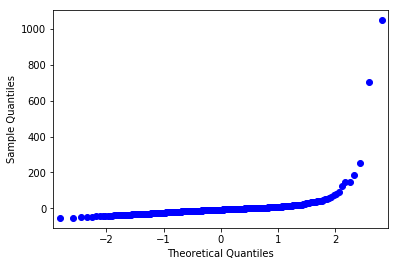

In [187]:
print(JB,JBpv,skw,kurt)
# p-value is not good
sm.qqplot(reg.resid).show()

Errors are not normal

## Transformation on response

In [213]:
df['log_area'] = np.log(df['area'] + 1) # add +1 to avoid log(0) (natural log)

In [214]:
train_df , test_df = train_test_split(df , test_size=0.2,random_state=0) # 20% of the data as the test data

In [215]:
reg = smf.ols('log_area ~ X + Y + day + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + season',data = train_df).fit()

118.41717905105023 1.9321297507722324e-26 1.217858610487358 3.9739955477384328


/Users/nithish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


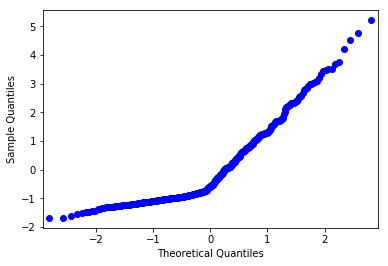

In [216]:
#2. check residual 
#2.1 Normality
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)
print(JB,JBpv,skw,kurt)
sm.qqplot(reg.resid).show()

qqplot after the log transformation looks better.

## box-cox transformation on response

In [264]:
from sklearn.preprocessing import PowerTransformer

In [221]:
df.shape

(517, 14)

In [265]:
power_trans = PowerTransformer()

In [266]:
df['area_boxcox'] = power_trans.fit_transform((df['area']).values.reshape(517,1))

In [267]:
train_df , test_df = train_test_split(df , test_size=0.2,random_state=0) # 20% of the data as the test data

902554.4906645373 0.0 13.561101780958687 230.4050860969935


/Users/nithish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


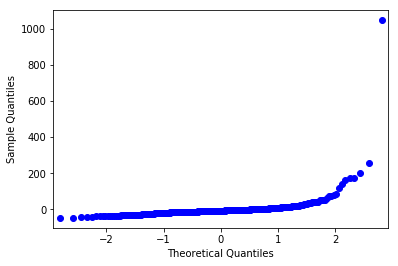

In [370]:
reg = smf.ols('area ~ X + Y + C(day) + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + C(season)',data = train_df).fit()

#2. check residual 
#2.1 Normality
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)
print(JB,JBpv,skw,kurt)
sm.qqplot(reg.resid).show()

In [371]:
df.columns

Index(['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'season', 'log_area', 'area_boxcox'],
      dtype='object')

127.63357515821247 1.926288365647504e-28 1.148367889923683 3.806205698058902


/Users/nithish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


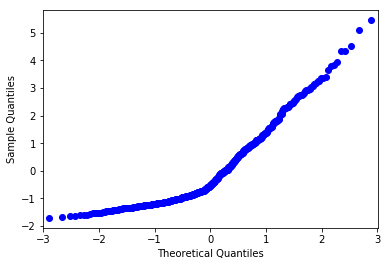

In [430]:
reg = smf.ols('log_area ~ X + Y + C(day) + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + C(season)',data = df).fit()

#2. check residual 
#2.1 Normality
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)
print(JB,JBpv,skw,kurt)
sm.qqplot(reg.resid).show()

Taking log has improved the normality of errors. But it did not make the erros perfectly normal

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

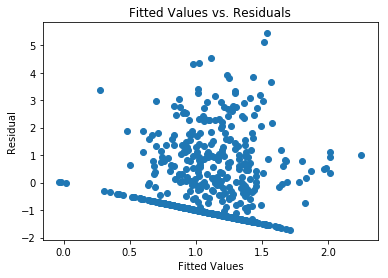

In [431]:
#2.2 Fitted Values vs. Residuals
p = reg.fittedvalues
res = reg.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
#nonlinearity

In [432]:
infl = reg.get_influence()

/Users/nithish/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


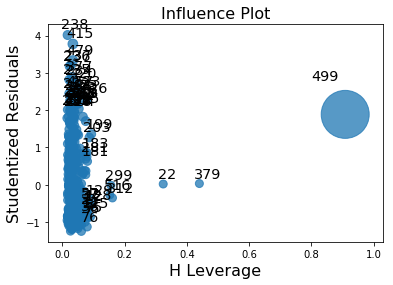

In [433]:
sm.graphics.influence_plot(reg).show()

In [434]:
n = df.shape[0]
p = len(reg.params)

In [438]:
#too messy. define your rules.
#threshold leverage
residus = reg.resid.as_matrix() #residuals
leviers = infl.hat_matrix_diag  #leverage

#p = carsnew.shape[1]
seuil_levier = 2*p/n # people choose 2.5 or 3 as well
print(seuil_levier)
#identification
atyp_levier = leviers > seuil_levier
print(atyp_levier)


0.07736943907156674
[False  True  True False False False False False False False False False
  True False False False False  True False False False False  True False
 False False False False False False False False False False False False
  True  True  True False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False 

/Users/nithish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [439]:
import scipy
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)

#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

#which ones?
print(df.index[atyp_stud],reg_studs[atyp_stud])

Int64Index([221, 222, 223, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
            236, 237, 238, 293, 337, 377, 392, 395, 415, 420, 457, 469, 471,
            473, 479, 493, 504, 513],
           dtype='int64') [2.01468222 2.01482134 2.50306409 2.29122221 2.0494687  1.98489745
 2.29670451 2.25643165 2.39325243 2.44774604 2.34782634 2.78769266
 2.81776917 3.17954438 3.19545081 4.0172417  2.18189017 2.00438793
 2.89210858 2.13597317 2.04002939 3.77859391 2.707174   2.50494949
 2.17219347 2.18594536 2.40195433 3.33722724 1.992083   1.96925358
 2.16768888]


In [441]:
#suspicious observations with one of the two criteria
pbm_infl = np.logical_or(atyp_levier,atyp_stud)
print(sum(pbm_infl))

55


In [442]:
print(df.index[pbm_infl])

Int64Index([  1,   2,  12,  17,  22,  36,  37,  38,  57,  75,  76, 125, 128,
            129, 181, 183, 199, 203, 221, 222, 223, 226, 227, 228, 229, 230,
            231, 232, 233, 234, 235, 236, 237, 238, 281, 293, 299, 312, 337,
            377, 379, 392, 395, 415, 420, 457, 469, 471, 473, 479, 493, 499,
            504, 513, 516],
           dtype='int64')


In [444]:
high_infl = df.index[pbm_infl]

In [519]:
fil_df = df[~df.index.isin(high_infl)]

In [520]:
df.columns

Index(['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'season', 'log_area', 'area_boxcox'],
      dtype='object')

In [544]:
reg = smf.ols('log_area ~ X + Y + C(day) + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + C(season)',data = fil_df).fit()

In [545]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.922
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0113
Time:                        19:20:53   Log-Likelihood:                -683.96
No. Observations:                 462   AIC:                             1408.
Df Residuals:                     442   BIC:                             1491.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3085    

## Selecting model based on AIC and BIC scores

Lets us check the prediction power of model with all the parameters

In [523]:
def print_aic_bic(model_str , data):
    model = smf.ols(model_str , data).fit()
    print('aic/bic {0}/{1}'.format(model.aic , model.bic))

In [524]:
print_stats('log_area ~ X + Y + day + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + season' , fil_df)

RMSE train/test 1.055742731644523/1.108231236486895


In [525]:
print_aic_bic('log_area ~ X + Y + day + FFMC + DMC + \
              DC + ISI + temp + RH + wind + rain + season' , fil_df)

aic/bic 1407.9134647210326/1490.6247625426674


* Selecting Parameters based on the t-test

In [526]:
print_stats('log_area ~  FFMC + DMC  +  \
               ISI + season' , fil_df)

RMSE train/test 1.08433544597855/1.1153476092277426


In [527]:
print_aic_bic('log_area ~  FFMC + DMC  +  \
               ISI + season' , fil_df)

aic/bic 1403.397869549477/1432.3468237870493


FFMC, DMC, ISI and season are selected from the t-test

In [528]:
print_stats('log_area ~  FFMC + DMC  + rain+ \
               ISI + season' , fil_df)

RMSE train/test 1.0824820593703397/1.1124544474100473


In [529]:
print_aic_bic('log_area ~  FFMC + DMC  + rain+ \
               ISI + season' , fil_df)

aic/bic 1403.6925986850028/1436.7771178136568


In [530]:
print_stats('log_area ~  FFMC + DMC  + rain+ \
               ISI + season+temp' , fil_df)

RMSE train/test 1.0818816557450381/1.112224924166635


In [531]:
print_aic_bic('log_area ~  FFMC + DMC  + rain+ \
               ISI + season+temp' , fil_df)

aic/bic 1405.2256443758263/1442.445728395562


Rain and temperature are forecefully accomdated into the model


In [532]:
print_stats('log_area ~  FFMC + DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df)

RMSE train/test 1.0711370491833094/1.101529545243626


In [535]:
print_aic_bic('log_area ~  FFMC + DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df)

aic/bic 1401.846830974262/1451.473609667243


> X*Y feature gives the distance in north east direction

1. 'log_area ~ X + Y + day + FFMC + DMC + DC + ISI + temp + RH + wind + rain + season'

1. 'log_area ~  FFMC + DMC  + ISI + season'

1. 'log_area ~  FFMC + DMC  + rain+  ISI + season'

1. 'log_area ~  FFMC + DMC  + rain+ ISI + season+temp'

1. 'log_area ~  FFMC + DMC  + rain+ ISI + season+temp + X + Y + X*Y  '

AIC BIC scores look similar but based on the predictions on the holdout set, we select model 5.

# Model diagnosis 

In [547]:
reg = smf.ols('log_area ~  FFMC + DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df).fit()

In [548]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.437
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00585
Time:                        21:19:06   Log-Likelihood:                -688.92
No. Observations:                 462   AIC:                             1402.
Df Residuals:                     450   BIC:                             1451.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0379      2.493  

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

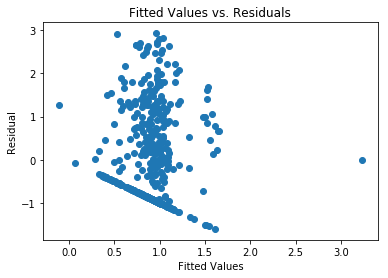

In [538]:
#2.2 Fitted Values vs. Residuals
p = reg.fittedvalues
res = reg.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
#nonlinearity

Errors are not perfectly normal but they are do not look very off

-----

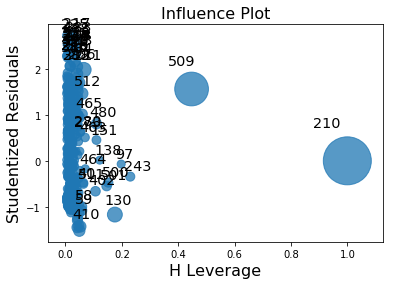

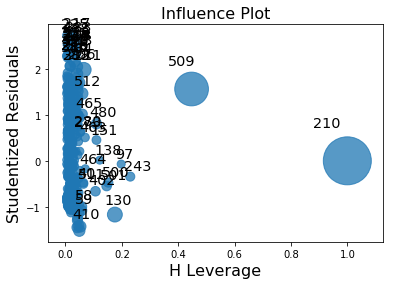

In [539]:
#graphical representation of the influences()
sm.graphics.influence_plot(reg)

No Influential points in the dataset now

Final model expression

log(area)  =    -8.276030714599866 * Intercept + 3.456837915127542 * season[T.spring] + <br>
    2.8786349929691113 * season[T.summer] + 3.148972019677188 * season[T.winter] + <br>
    0.0728392241907228 * FFMC + 0.01092928829840275 * DMC + -0.4542548412209433 * rain + <br>
    -0.08704925445120687 * ISI + 0.042136302584350055 * temp + 0.4585888739129606 * X +<br>
    0.24005865268231952 * Y + -0.07201874116712258 * (X*Y)

In [553]:
fil_df['sum_or_not'] = fil_df.season.apply(lambda x: 'summer' if x=='summer' else 'notsummer')

/Users/nithish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Breusch Pagan Test for Heteroskedasticity

In [557]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
#from statsmodels.stats.diagnostic import het_white
#white_test = het_white(reg.resid,  reg.model.exog)
bp_test = het_breuschpagan(reg.resid, reg.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 12.361312579554085, 'LM-Test p-value': 0.1936980029952157, 'F-Statistic': 1.3806921083465646, 'F-Test p-value': 0.1941321577552263}


In [567]:
fil_df.loc[:,'X_Y'] = fil_df['X']  * fil_df['Y']

(462, 9)

## Multicollinearity using VIF

In [578]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
carsnew2=fil_df[[ 'FFMC', 'DMC', 'rain', 'ISI','temp' , 'X', 'Y' , 'X_Y']]

vif["VIF Factor"] = [variance_inflation_factor(carsnew2.values, i) for i in range(carsnew2.shape[1])]
vif["features"] = carsnew2.columns
print(vif)

   VIF Factor features
0   79.670288     FFMC
1    5.506165      DMC
2    1.030321     rain
3    8.270079      ISI
4   17.446470     temp
5   53.216259        X
6   63.030377        Y
7   60.745685      X_Y


FFMC shows high signs of multicollinearity

In [579]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
carsnew2=fil_df[[ 'DMC', 'rain', 'ISI','temp' , 'X', 'Y' , 'X_Y']]

vif["VIF Factor"] = [variance_inflation_factor(carsnew2.values, i) for i in range(carsnew2.shape[1])]
vif["features"] = carsnew2.columns
print(vif)

   VIF Factor features
0    5.454196      DMC
1    1.029286     rain
2    7.656428      ISI
3   14.565070     temp
4   24.194434        X
5   17.530033        Y
6   23.501084      X_Y


Removing FFMC decreases the VIF values of other predictors significantly.

---

In [581]:
reg = smf.ols('log_area ~ DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df).fit()

In [582]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.585
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00470
Time:                        22:09:14   Log-Likelihood:                -689.42
No. Observations:                 462   AIC:                             1401.
Df Residuals:                     451   BIC:                             1446.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1177      1.176  

In [583]:
print_aic_bic('log_area ~ DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df)

aic/bic 1400.8336847639289/1446.324898565828


In [584]:
print_stats('log_area ~ DMC  + rain+ \
               ISI + season+temp + X + Y + X*Y  ' , fil_df)

RMSE train/test 1.0743128123752579/1.0923891054081005


In [585]:
print_stats('log_area ~ DMC  + rain+ \
               ISI +temp + X + Y + X*Y  ' , fil_df)

RMSE train/test 1.0929119655436512/1.1028043908449996


In [586]:
reg = smf.ols('log_area ~ DMC  + rain+ \
               ISI +temp + X + Y + X*Y  ' , fil_df).fit()

In [587]:
vals = reg.params

In [598]:
' + '.join('{0:.2f} * {1}'.format(i,j) for i,j in zip(vals.values,vals.index)   )

'-0.02 * Intercept + 0.00 * DMC + -0.74 * rain + 0.01 * ISI + -0.01 * temp + 0.19 * X + 0.21 * Y + -0.04 * X:Y'

In [ ]:
-0.02 * Intercept + 0.00 * DMC + -0.74 * rain + 0.01 * ISI + -0.01 * temp + 0.19 * X + 0.21 * Y + -0.04 * X:Y'


In [601]:
np.exp(-0.74)

0.4771139155210344

In [ ]:
For every 1 mm (meter-squared) increase in outside rain 0.47 

In [314]:
predictions = reg.predict(test_df)

In [360]:
mean_squared_error( predictions , test_df.area) ** 0.5

74.04619655696439

In [310]:
# log transfomation error

In [309]:
mean_squared_error( np.exp(predictions)-1 , test_df.area) ** 0.5

111.80120367207327

In [354]:
# yeo-johnson trans error -> simlar to log transformation

In [355]:
df.columns

Index(['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'season', 'log_area', 'area_boxcox'],
      dtype='object')

In [365]:
new_trans = PowerTransformer()

ValueError: Expected 2D array, got 1D array instead:
array=[86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91.  92.5 92.5 92.8 63.5 90.9
 92.9 93.3 91.7 84.9 89.2 86.3 91.  91.8 94.3 90.2 93.5 91.4 92.4 90.9
 93.4 93.5 94.3 88.6 88.6 91.7 91.8 90.3 90.6 90.  90.6 88.1 79.5 90.2
 94.8 92.5 90.1 94.3 90.9 94.2 87.2 87.6 92.9 90.2 92.1 92.1 91.7 92.9
 90.3 92.6 84.  86.6 89.3 89.3 93.  90.2 91.1 91.7 92.4 92.4 92.4 91.7
 91.2 94.3 91.7 88.8 93.3 84.2 86.6 87.6 90.1 91.  91.4 90.2 94.8 92.1
 91.7 92.9 92.9 92.9 93.5 91.7 90.2 91.7 92.3 91.4 91.1 89.7 83.9 69.
 91.4 91.4 91.4 88.8 94.8 92.5 82.1 85.9 91.4 90.2 92.5 88.6 85.9 91.7
 89.7 91.8 88.1 88.1 91.7 91.7 90.1 93.  91.5 91.5 92.4 84.4 94.3 92.6
 87.6 93.5 91.4 92.6 68.2 87.2 89.3 93.7 88.1 93.5 92.4 90.9 85.8 91.
 90.9 95.5 90.1 90.  95.5 95.2 90.1 84.4 94.8 93.7 92.5 90.1 90.1 94.3
 93.4 94.8 93.4 92.1 92.1 92.4 90.1 95.2 90.6 92.5 89.7 84.9 92.1 96.
 91.2 95.2 92.9 85.6 91.4 90.9 90.2 90.2 81.5 90.2 90.1 88.8 92.4 84.9
 86.8 91.7 93.9 91.  89.3 90.9 90.8 90.7 91.2 95.2 94.8 92.9 94.8 93.9
 81.5 92.9 91.  63.5 91.  90.1 83.9 91.4 90.6 92.9 93.5 91.  92.4 93.7
 90.6 93.5 94.3 87.6 91.7 91.7 92.4 88.6 92.9 90.1 90.2 93.3 87.6 88.3
 90.1 93.5 91.7 92.2 93.5 92.2 92.9 93.5 91.  84.4 92.5 91.4 92.5 91.
 92.5 81.9 88.  83.  94.2 91.8 91.8 91.8 91.8 92.2 93.1 93.1 93.1 93.1
 93.1 91.9 91.6 87.5 94.2 94.2 91.8 91.8 93.6 91.6 91.6 91.1 94.3 93.7
 94.3 92.1 92.1 92.1 92.1 92.1 92.1 84.4 84.  84.6 85.4 85.4 85.4 85.4
 84.7 85.4 84.9 86.9 85.2 93.9 91.2 91.6 91.6 91.6 91.6 91.6 91.6 93.1
 92.3 93.1 90.4 90.4 91.2 53.4 90.4 90.4 91.1 91.1 85.1 89.6 89.6 89.6
 92.4 92.4 92.4 92.4 50.4 92.6 92.6 91.2 92.4 92.4 92.8 92.8 92.8 92.8
 92.8 90.7 88.1 92.2 92.2 92.2 92.2 92.2 92.2 91.2 91.2 92.1 91.6 91.6
 91.6 91.6 91.6 91.6 91.6 91.9 91.5 91.5 91.5 91.5 91.5 92.1 92.1 92.1
 92.1 92.1 92.1 92.1 92.1 92.1 92.1 92.5 92.5 92.5 92.5 92.5 88.2 91.9
 91.9 91.9 91.1 91.1 91.2 91.  91.  91.9 92.  94.8 90.3 91.2 92.1 93.7
 90.9 18.7 93.7 90.7 95.2 91.6 91.6 91.6 90.5 90.9 94.8 94.8 84.7 91.1
 91.  93.4 84.1 85.  90.5 91.6 93.7 93.3 93.3 91.1 94.8 90.7 87.9 94.6
 87.1 84.7 90.3 92.3 84.1 84.6 92.3 93.7 93.6 94.8 92.7 93.4 92.  91.6
 91.7 95.2 88.9 91.2 93.7 91.6 91.6 92.1 94.8 91.6 89.7 92.1 94.8 93.6
 90.6 90.8 92.1 89.4 93.7 91.1 90.3 92.1 87.9 90.7 90.3 94.  92.  93.4
 89.7 91.6 95.2 90.5 91.5 89.4 91.6 94.6 91.6 91.7 93.7 91.6 93.7 93.7
 91.  75.1 75.1 79.5 87.2 90.2 91.3 91.  91.  89.6 88.2 90.5 93.  93.7
 93.5 93.7 93.7 89.2 93.2 93.2 94.9 94.9 94.9 95.  95.1 95.1 95.1 95.1
 95.1 95.8 95.9 95.9 96.  96.2 96.2 96.1 96.1 96.1 96.1 96.1 96.1 94.5
 94.5 91.  91.  91.  91.  91.  91.  81.6 81.6 81.6 81.6 94.4 79.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.